In [24]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_house=pd.read_csv("1553768847_housing.csv")
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
df_house.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

### Handle Missing Values
Fill the missing values with the mean of the respective column.

In [7]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

<br> </br>We see that there are 207 null values in Column total_bedrooms. <br>We replace the null values with the mean and check for nulls again.

In [8]:
df_house.total_bedrooms=df_house.total_bedrooms.fillna(df_house.total_bedrooms.mean())
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Encode Categorical data

In [9]:
le = LabelEncoder()
df_house['ocean_proximity']=le.fit_transform(df_house['ocean_proximity'])

### Standardize Data

In [10]:
# Get column names first
names = df_house.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_house)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,1.172900


### Visualize relationship between features and target <br>
Check for linearity

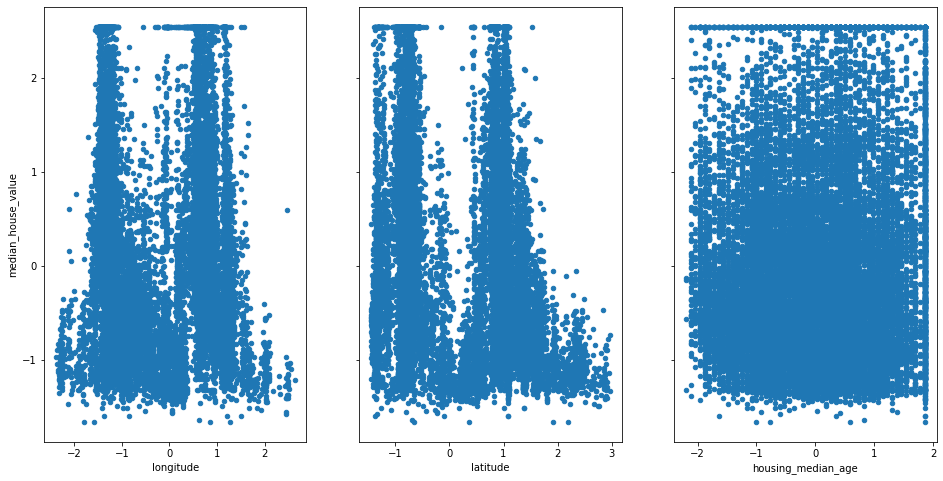

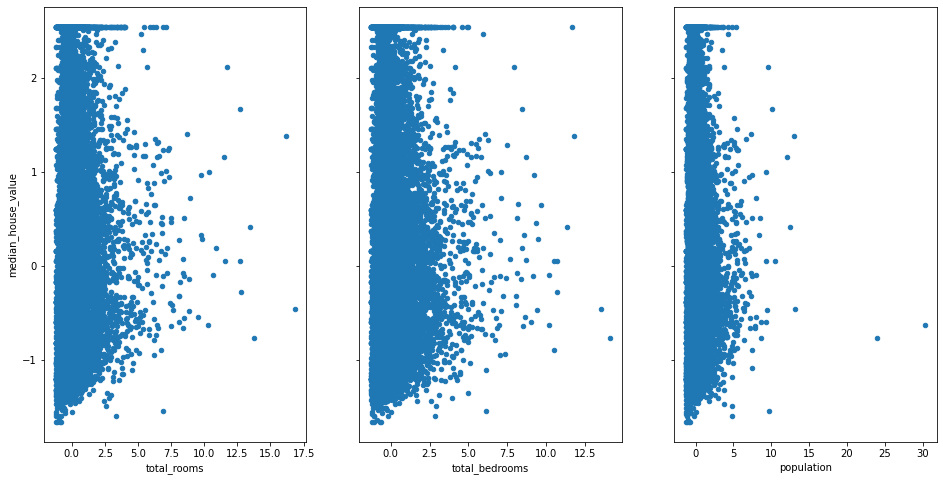

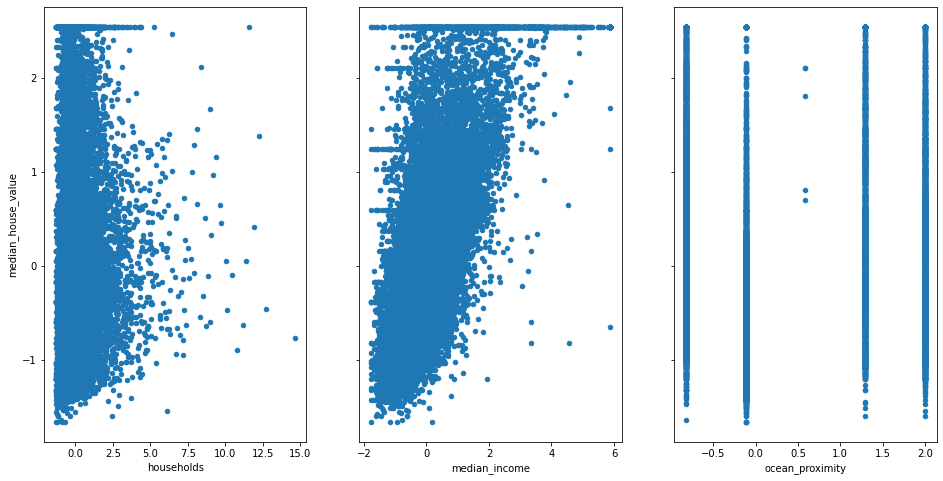

In [11]:
#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='ocean_proximity',y='median_house_value',ax=axs[2],figsize=(16,8))

<br>Check for outliers

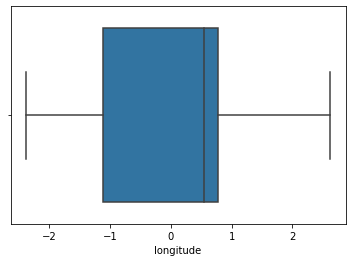

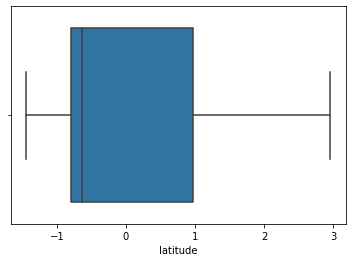

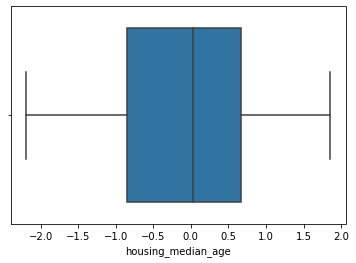

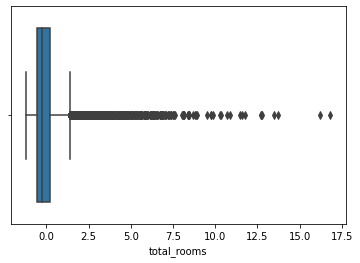

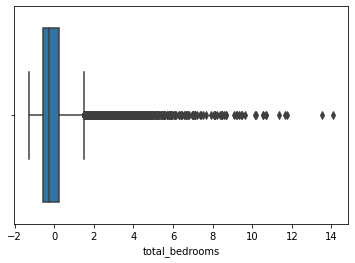

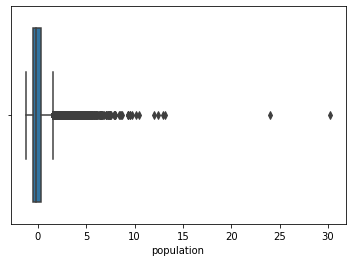

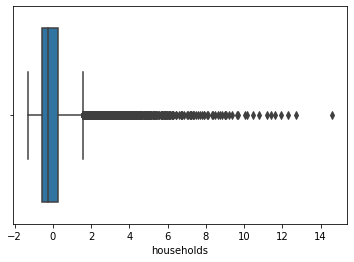

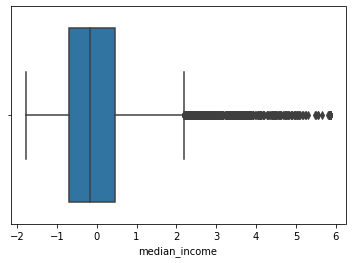

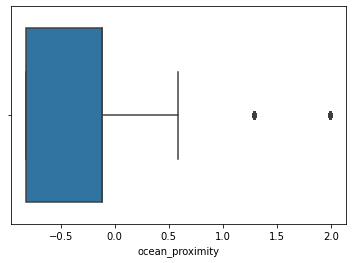

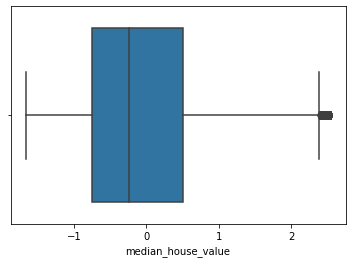

In [12]:
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

### Extract X and Y data

In [13]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
X=scaled_df[X_Features]
Y=scaled_df['median_house_value']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [14]:
print(df_house.shape)
print(X.shape)
print(Y.shape)

(20640, 10)
(20640, 9)
(20640,)


<br> </br>
### Split the dataset

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


<br></br>
### Apply Various Algorithms
* Linear Regression
* Decision Tree Regression
* Random Forest Regression (Ensemble Learning)
* Lasso
* Ridge
* Elastic Net

#### Perform Linear Regression :
* Perform Linear Regression on training data.
* Predict output for test dataset using the fitted model.
* Print root mean squared error (RMSE) from Linear Regression.

In [16]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [17]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [18]:
y_predict = linreg.predict(x_test)

In [19]:
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.6056598120301221
0.6276223517950296


#### Perform Decision Tree Regression :
* Perform Decision Tree Regression on training data.
* Predict output for test dataset using the fitted model.
* Print root mean squared error from Decision Tree Regression

In [20]:
dtreg=DecisionTreeRegressor()
dtreg.fit(x_train,y_train)
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(presort=False)

In [21]:
y_predict = dtreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.6003619307645952
0.6341084489291638


#### Perform Random Forest Regression :
* Perform Random Forest Regression on training data.
* Predict output for test dataset using the fitted model.
* Print RMSE (root mean squared error) from Random Forest Regression.

In [25]:
rfreg=RandomForestRegressor()
rfreg.fit(x_train,y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RandomForestRegressor(n_estimators=10)

In [26]:
y_predict = rfreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.4271724391469423
0.8147609525644036


#### Perform Lasso Regression (determine which variables should be retained in the model):
* Perform Lasso Regression on training data.
* Predict output for test dataset using the fitted model.
* Print RMSE (root mean squared error) from Lasso Regression.

In [27]:
lassoreg=Lasso(alpha=0.001,normalize=True)
lassoreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(lassoreg.score(x_test,y_test)))

0.7193140967070711
R2 Value/Coefficient of determination:0.4747534206169959


#### Perform Ridge Regression (addresses multicollinearity issues) :
* Perform Ridge Regression on training data.
* Predict output for test dataset using the fitted model.
* Print RMSE (root mean squared error) from Ridge Regression.

In [28]:
ridgereg=Ridge(alpha=0.001,normalize=True)
ridgereg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(ridgereg.score(x_test,y_test)))

0.6056048844852343
R2 Value/Coefficient of determination:0.6276898909055972


#### Perform ElasticNet Regression :
* Perform ElasticNet Regression on training data.
* Predict output for test dataset using the fitted model.
* Print RMSE (root mean squared error) from ElasticNet Regression.

In [29]:
from sklearn.linear_model import ElasticNet
elasticreg=ElasticNet(alpha=0.001,normalize=True)
elasticreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,elasticreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(elasticreg.score(x_test,y_test)))

0.944358169398106
R2 Value/Coefficient of determination:0.09468529806704551



<br> </br>
#### Hypothesis testing and P values:

In [30]:
lm=smf.ols(formula='median_house_value ~ longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income+ocean_proximity',data=scaled_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:03:32   Log-Likelihood:                -18868.
No. Observations:               20640   AIC:                         3.776e+04
Df Residuals:                   20630   BIC:                         3.783e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.857e-17      0.004  -1.16e-14      1.000      -0.008       0.008
longitude             -0.7393      0.013    -57.263      0.000      -0.765      -0.714
latitude              -0.7858      0.013    -61.664      0.000      -0.811      -0.761
housing_median_age     0.1248      0.005     26.447      0.000       0.116       0.134
total_rooms           -0.1265      0.015     -8.609      0.000      -0.155      -0.098
total_bedrooms         0.2995      0.022     13.630      0.000       0.256       0.343
population            -0.3907      0.011    -36.927      0.000      -0.411      -0.370
households             0.2589      0.022     11.515      0.000       0.215       0.303
median_income          0.6549      0.005    119.287      0.000       0.644       0.666
ocean_proximity        0.0009      0.005      0.190      0.850      -0.008       0.010
==============================================================================
Omnibus:                     5037.491   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18953.000
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.054   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Perform Linear Regression with one independent variable :
* Extract just the median_income column from the independent variables (from X_train and X_test).
* Perform Linear Regression to predict housing values based on median_income.
* Predict output for test dataset using the fitted model.
* Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [31]:
x_train_Income=x_train[['median_income']]
x_test_Income=x_test[['median_income']]
print(x_train_Income.shape)
print(y_train.shape)

(16512, 1)
(16512,)


In [32]:
linreg=LinearRegression()
linreg.fit(x_train_Income,y_train)
y_predict = linreg.predict(x_test_Income)
#print intercept and coefficient of the linear equation
print(linreg.intercept_, linreg.coef_)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.005623019866893162 [0.69238221]
0.7212595914243148
0.47190835934467734


Insight:
Looking at the above values we can say that coefficient: a unit increase in median_income increases the median_house_value by 0.692 unit

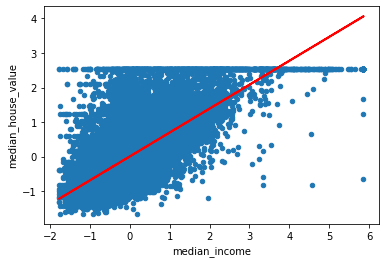

In [33]:
#plot least square line
scaled_df.plot(kind='scatter',x='median_income',y='median_house_value')
plt.plot(x_test_Income,y_predict,c='red',linewidth=2)

#### Hypothesis testing and P values:
Using the null hypothesis lets assume there is no relationship between median_income and median_house_value
Lets test this hypothesis. We shall reject the Null Hypothesis if 95% confidence inderval does not include 0

In [34]:
lm=smf.ols(formula='median_house_value ~ median_income',data=scaled_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:05:27   Log-Likelihood:                -22668.
No. Observations:               20640   AIC:                         4.534e+04
Df Residuals:                   20638   BIC:                         4.536e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.857e-17      0.005  -9.62e-15      1.000      -0.010       0.010
median_income     0.6881      0.005    136.223      0.000       0.678       0.698
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insight:
The P value is 0.000 indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
 so, there is a strong relationship between median_house_value and median_income.